# Minuit

Minuit è un package sviluppato da Fred James al CERN negli anni '70 in fortran, successivamente portato in C++, e recentemente disponibile in python.

È ancora insuperato per una serie di problemi di minimizzazione. Rispetto anche ad altri algoritmi di minimizzazione forniti in ```scipy.optimize``` continua ad essere preferibile per la gran parte dei problemi di fit che possono essere necessari in fisica.

La ricerca del minimo è fatta seguendo i gradiente della funzione intorno ad un insieme di **valori iniziali**. In caso più minimi siano presenti, in genere viene raggiunto quello più vicini ai valori inizali.

È disponibile un tutorial online in diverse parti all'<a href="https://iminuit.readthedocs.io/en/stable/">interfaccia python ```iminuit```</a> sul quale sono basati gli esempi che seguono.

C'è anche una <a href="https://iminuit.readthedocs.io/en/stable/">documentazione ufficiale del modulo</a>.

In [113]:
from matplotlib import pyplot as plt
import numpy as np
import iminuit
from iminuit import Minuit
import math
print(iminuit.__version__)

2.30.1


Costruiamo una nostra funzione di likelihood, e minimizziamola. Consideriamo una PDF gaussiana con $\sigma$ nota, per semplicità.

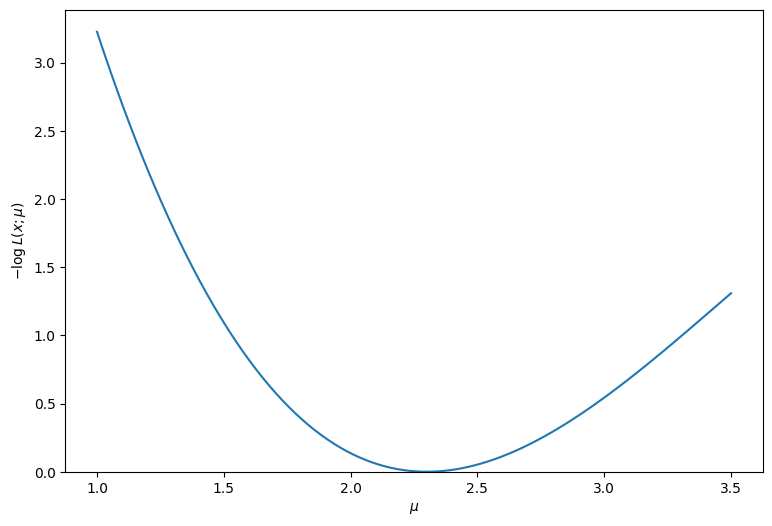

In [130]:
sigma = 0.6
sigma2 = sigma**2
two_sigma2 = 2*sigma2
x_obs = 2.3
def nl_like_fun(mu):
    return (x_obs - mu)**2/two_sigma2 + 0.4*(x_obs - mu)**3
mus = np.linspace(1, 3.5, 100)
plt.figure(figsize=(9, 6))
plt.plot(mus, nl_like_fun(mus))
plt.xlabel('$\mu$')
plt.ylabel('$-\log L(x;\mu)$')
plt.ylim(0)
plt.show()

La funzione ```like_fun``` può essere definita come $-\log{\cal{L}}$ oppure come $-2\log{\cal{L}}=\chi^2$. Nei due casi va moltiplicata per in fattore pari a $\frac{1}{2}$ o $1$, perché di default Minuit considera la minimmizzazzione di un $\chi^2$.

In [151]:
Minuit.LIKELIHOOD, Minuit.LEAST_SQUARES

(0.5, 1.0)

In [152]:
nl_like_fun.errordef = Minuit.LIKELIHOOD

In [153]:
mu0 = 1.0
minuit = Minuit(nl_like_fun, mu=mu0)

In [154]:
minuit.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.178e-06                  │              Nfcn = 19               │
│ EDM = 2.18e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    2.3    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────┐
│    │   mu │
├────┼──────┤
│ mu │ 0.36 │
└────┴──────┘

In [155]:
print("starting value {:.3f}, minimum at {:.3f}".format(mu0, minuit.values["mu"]))

starting value 1.000, minimum at 2.299


Da notare che si può usare sia ```minuit.values["mu"]``` (per nome) che ```minuit.values[0]``` (per indice).

In [156]:
print("error: {:.3f}".format(minuit.errors["mu"]))

error: 0.600


L'errore si può calcolare approssimativamente con il calcolo della matrice delle derivate seconde (Hessiano).

In [157]:
minuit.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.178e-06                  │              Nfcn = 24               │
│ EDM = 2.18e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    2.3    │    0.6    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────┐
│    │   mu │
├────┼──────┤
│ mu │ 0.36 │
└────┴──────┘

In [161]:
minuit.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,mu,2.3,0.6,,,,,


In [159]:
for p in minuit.params:
    print(p.name, "= {:.3f} +/- {:.3f}".format(p.value, p.error))

mu = 2.299 +/- 0.600


In [162]:
repr(minuit.params['mu'])

"Param(number=0, name='mu', value=2.2987479598897287, error=0.5996757342639982, merror=None, is_const=False, is_fixed=False, lower_limit=None, upper_limit=None)"

L'errore si può calcolare più accuratamente con uno scan di $-2\log{\cal L}$.

In [163]:
minuit.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.178e-06                  │              Nfcn = 30               │
│ EDM = 2.18e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu   │    2.3    │    0.6    │    -0.6    │    0.7     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          mu           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.6    │    0.7    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────┐
│    │   mu │
├────┼──────┤
│ mu │ 0.36 │
└────┴──────┘

In [171]:
for p in minuit.params:
    print(p.merror)
    print(p.name, "= {:.3f} {:.3f}/+{:.3f}".format(p.value, p.merror[0], p.merror[1]))

(-0.5557361365494541, 0.6688563405106732)
mu = 2.299 -0.556/+0.669


In [165]:
minuit.merrors

┌──────────┬───────────────────────┐
│          │          mu           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.6    │    0.7    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘

In [166]:
repr(minuit.merrors['mu'])

"<MError number=0 name='mu' lower=-0.5557361365494541 upper=0.6688563405106732 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=6 min=2.2987479598897287>"

In [167]:
minuit.merrors['mu'].lower, minuit.merrors['mu'].upper

(-0.5557361365494541, 0.6688563405106732)

In [146]:
mu_hat = minuit.values['mu']
mu_err_lo, mu_err_up = minuit.merrors['mu'].lower, minuit.merrors['mu'].upper

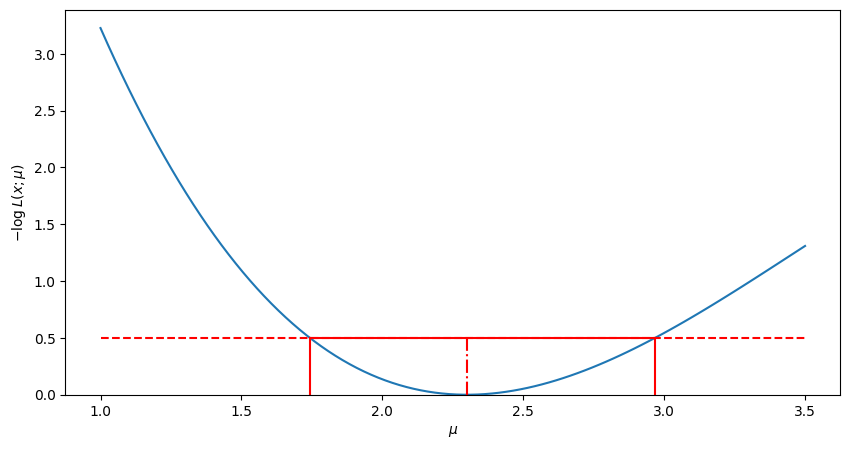

In [174]:
plt.figure(figsize=(10, 5))
plt.plot(mus, nl_like_fun(mus))
plt.xlabel('$\mu$')
plt.ylabel('$-\log L(x;\mu)$')
plt.plot((mu_hat,mu_hat), (0, 0.5), color='r', linestyle='-.')
plt.plot((mu_hat + mu_err_lo, mu_hat + mu_err_lo), (0, 0.5), color='r')
plt.plot((mu_hat + mu_err_up, mu_hat + mu_err_up), (0, 0.5), color='r')
plt.plot((mu_hat + mu_err_lo, mu_hat + mu_err_up), (0.5, 0.5), color='r')
plt.plot((mus[0], mus[-1]), (0.5, 0.5), color='r', linestyle='--')
plt.ylim(0)
plt.show()

**Nota**: l'opzione interattive (```m.interactive()```), nella documentazione, può avere qualche difficoltà di implementazione in jupyter notebook.

In [176]:
# minuit.interactive()

## Regressione lineare
Implementiamo un fit lineare ai minimi quadrati usando ```Minuit```.

In [177]:
def line(x, a, b):
    return a*x + b

In [178]:
np.random.seed(3445)
data_x = np.linspace(0, 1, 11)
data_yerr = 0.1  # potremmo anche usare un vettore con errori differenti per ciascun punto
data_y = line(data_x, 2, 1) + np.random.normal(0, data_yerr, len(data_x))

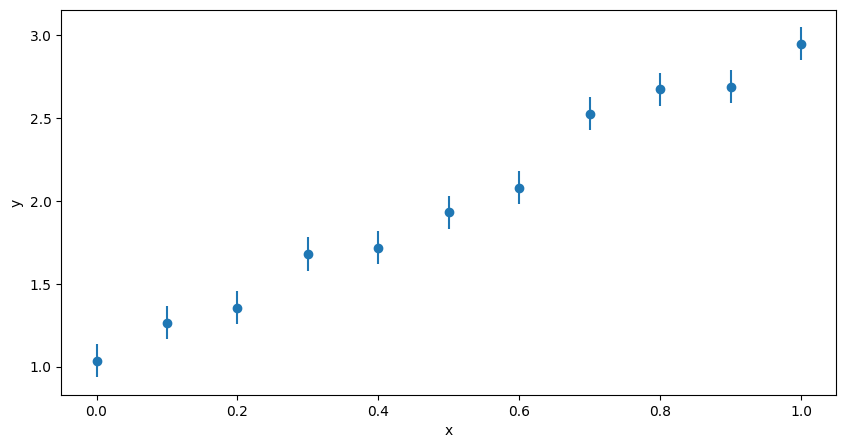

In [180]:
plt.figure(figsize=(10, 5))
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Usiamo la funzione ```LeastSquares``` che ci fa risparemiare di definire manualmente il $\chi^2$.

<span style="color:blue">Nota: quello che in Minuit viene chiamato ```LeastSquares``` in realtà un modello di $\chi^2$ perché è possibile passare errori che siano diversi tra loro.</span>

In [181]:
from iminuit.cost import LeastSquares
least_squares = LeastSquares(data_x, data_y, data_yerr, line)
print(least_squares.errordef)
m = Minuit(least_squares, a=0, b=0)

1.0


In [182]:
m.migrad()  # ricerca del minimo secondo la discesa del gradiente

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.02 (χ²/ndof = 0.8)       │              Nfcn = 36               │
│ EDM = 2.09e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.93    │   0.10    │            │            │         │         │       │
│ 1 │ b    │   1.02    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00909 -0.0045 │
│ b │ -0.0045 0.00318 │
└───┴─────────────────┘

In [183]:
m.hesse()   # calcolo accurato delle incertezze

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.02 (χ²/ndof = 0.8)       │              Nfcn = 46               │
│ EDM = 1.61e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.93    │   0.10    │            │            │         │         │       │
│ 1 │ b    │   1.02    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00909 -0.0045 │
│ b │ -0.0045 0.00318 │
└───┴─────────────────┘

In [184]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.02 (χ²/ndof = 0.8)       │              Nfcn = 78               │
│ EDM = 1.61e-22 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.93    │   0.10    │   -0.10    │    0.10    │         │         │       │
│ 1 │ b    │   1.02    │   0.06    │   -0.06    │    0.06    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.1    │    0.1    │   -0.06   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │ 0.00909 -0.0045 │
│ b │ -0.0045 0.00318 │
└───┴─────────────────┘

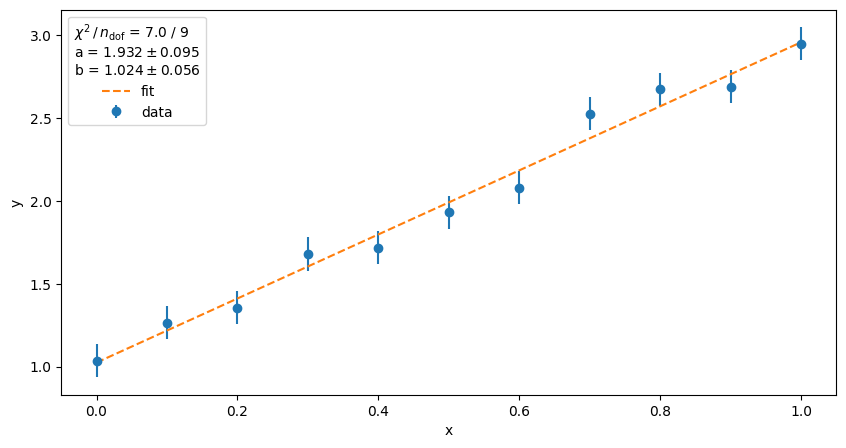

In [191]:
plt.figure(figsize=(10, 5))
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, line(data_x, *m.values), linestyle='--', label="fit")
fit_info = [ rf"$\chi^2\, /\, n_\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(rf"{p} = ${v:.3f} \pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

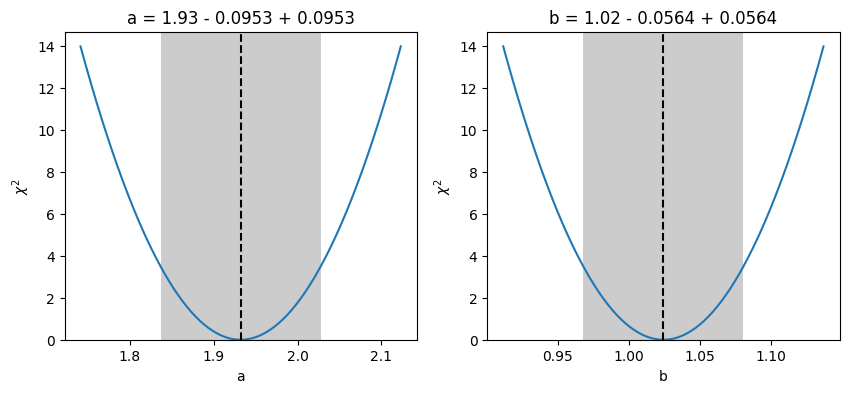

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
plt.sca(axs[0])
x, y = m.draw_profile("a")
plt.sca(axs[1])
x, y = m.draw_profile("b")
axs[0].set_ylabel("$\chi^2$")
axs[1].set_ylabel("$\chi^2$")
axs[0].set_ylim(0)
axs[1].set_ylim(0)
plt.show()

In [192]:
av, bv = m.values['a'], m.values['b']
ae, be = m.errors['a'], m.errors['b']
ap, am, bp, bm = av + ae, av - ae, bv + be, bv - be

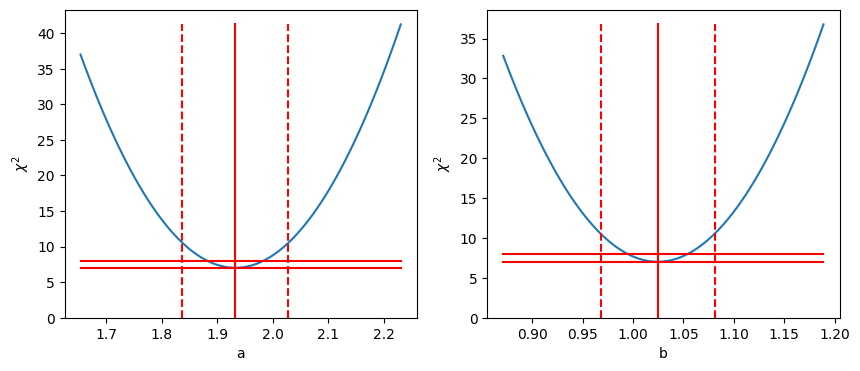

In [193]:
def chi_2(a, b):
    return (((data_y - [line(x, a, b) for x in data_x])/data_yerr)**2).sum()
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
avs = np.linspace(am*0.9, ap*1.1, num=100)
c2s = np.array([chi_2(a, bv) for a in avs])
axs[0].plot(avs, c2s)
axs[0].plot((av, av), (0, c2s.max()), c='r')
axs[0].plot((ap, ap), (0, c2s.max()), c='r', linestyle='--')
axs[0].plot((am, am), (0, c2s.max()), c='r', linestyle='--')
axs[0].plot((avs.min(), avs.max()), (c2s.min(), c2s.min()), c='r')
axs[0].plot((avs.min(), avs.max()), (c2s.min() + 1, c2s.min() + 1), c='r')
axs[0].set_xlabel('a')
axs[0].set_ylim(0)
axs[0].set_ylabel(r'$\chi^2$')
bvs = np.linspace(bm*0.9, bp*1.1, num=100)
c2s = np.array([chi_2(av, b) for b in bvs])
axs[1].plot(bvs, c2s)
axs[1].plot((bv, bv), (0, c2s.max()), c='r')
axs[1].plot((bp, bp), (0, c2s.max()), c='r', linestyle='--')
axs[1].plot((bm, bm), (0, c2s.max()), c='r', linestyle='--')
axs[1].plot((bvs.min(), bvs.max()), (c2s.min(), c2s.min()), c='r')
axs[1].plot((bvs.min(), bvs.max()), (c2s.min() + 1, c2s.min() + 1), c='r')
axs[1].set_xlabel('b')
axs[1].set_ylim(0)
axs[1].set_ylabel(r'$\chi^2$')
plt.show()

Perché le linee per $\chi^2 = \chi^2_{\mathrm{min}}+1$ non corrispondono ad un intervallo di $\pm 1\sigma$? Proviamo a visualizzare il contorno a due dimensioni.
## Nota 
I contorni che *contengono* probabilità del 68%, 95% e 99% **non** corrispondono a 1, 2 e 3 $\sigma$, ma hanno un'ampiezza corrispondente minore, come discusso durante la lezione sulle gaussiane in più dimensioni.

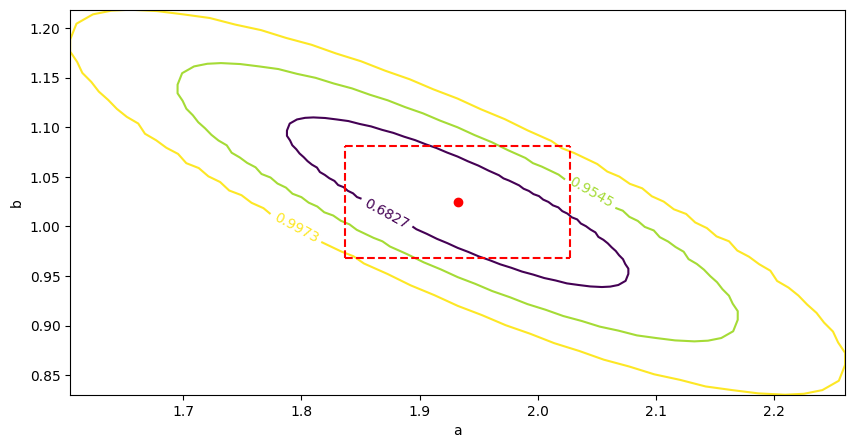

In [197]:
plt.figure(figsize=(10, 5))
m.draw_mncontour("a", "b", cl=(0.68269, 0.95450, 0.99730))
plt.plot((av), (bv), marker='o', color='r')
plt.plot((am, am), (bm, bp), linestyle='--', color='r')
plt.plot((ap, ap), (bm, bp), linestyle='--', color='r')
plt.plot((am, ap), (bm, bm), linestyle='--', color='r')
plt.plot((am, ap), (bp, bp), linestyle='--', color='r')
plt.show()

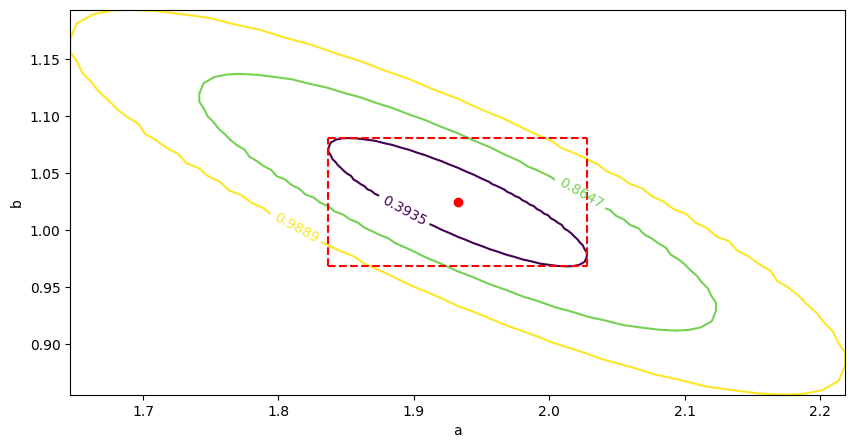

In [196]:
plt.figure(figsize=(10, 5))
m.draw_mncontour("a", "b", cl=(0.39347, 0.86466, 0.98889))
plt.plot((av), (bv), marker='o', color='r')
plt.plot((am, am), (bm, bp), linestyle='--', color='r')
plt.plot((ap, ap), (bm, bp), linestyle='--', color='r')
plt.plot((am, ap), (bm, bm), linestyle='--', color='r')
plt.plot((am, ap), (bp, bp), linestyle='--', color='r')
plt.show()

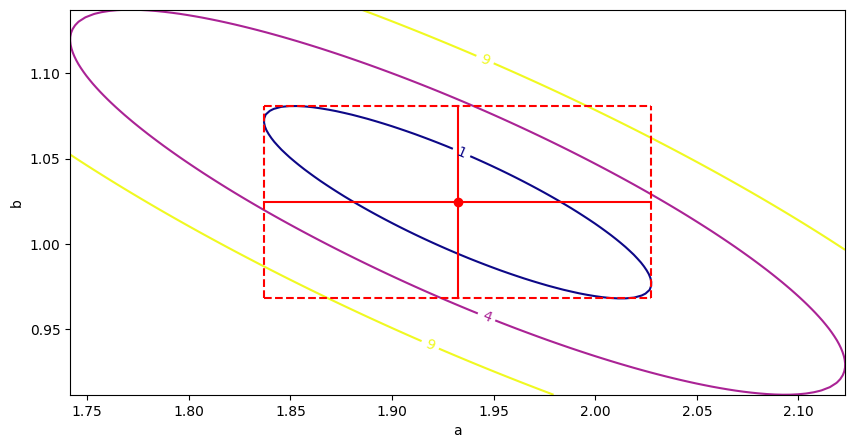

In [198]:
plt.figure(figsize=(10, 5))
x, y, z = m.contour("a", "b", subtract_min=True, size=100)
cs = plt.contour(x, y, z, (1, 4, 9), cmap='plasma')
plt.plot((av), (bv), marker='o', color='r')
plt.plot((am, am), (bm, bp), linestyle='--', color='r')
plt.plot((ap, ap), (bm, bp), linestyle='--', color='r')
plt.plot((am, ap), (bm, bm), linestyle='--', color='r')
plt.plot((am, ap), (bp, bp), linestyle='--', color='r')
plt.plot((am, ap), (bv, bv), linestyle='-', color='r')
plt.plot((av, av), (bp, bm), linestyle='-', color='r')
plt.xlabel('a')
plt.ylabel('b')
plt.clabel(cs)
plt.show()

## Fit polinomiale.

Proviamo ora un fit con una polinomiale di secondo grado (parabola).

In [199]:
def poly_line(x, *par):
    return np.polyval(par, x)

In [206]:
least_squares = LeastSquares(data_x, data_y, data_yerr, poly_line)

In [211]:
Minuit(least_squares, *(5, 5), name=('a', 'b'))

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,5.00,0.05,,,,,
1,b,5.00,0.05,,,,,


In [212]:
# la sintassi seguente genera un errore
#Minuit(least_squares, a=5, b=5)

Di defaut i nomi dei parametri sono ```x0```, ```x1```, ..., ma possono essere cambiati esplicitandoli.

In [213]:
m = Minuit(least_squares, *(5, 5, 5), name=('a', 'b', 'c'))

In [214]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.958 (χ²/ndof = 0.9)      │              Nfcn = 52               │
│ EDM = 1.36e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.08    │   0.34    │            │            │         │         │       │
│ 1 │ b    │   1.85    │   0.35    │            │            │         │         │       │
│ 2 │ c    │   1.04    │   0.08    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │  0.117  -0.12  0.017 │
│ b │  -0.12  0.126 -0.022 │
│ c │  0.017 -0.022 0.0058 │
└───┴──────────────────────┘

In [215]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.958 (χ²/ndof = 0.9)      │              Nfcn = 68               │
│ EDM = 1.24e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.08    │   0.34    │            │            │         │         │       │
│ 1 │ b    │   1.85    │   0.35    │            │            │         │         │       │
│ 2 │ c    │   1.04    │   0.08    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │  0.117  -0.12  0.017 │
│ b │  -0.12  0.126 -0.022 │
│ c │  0.017 -0.022 0.0058 │
└───┴──────────────────────┘

In [216]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.958 (χ²/ndof = 0.9)      │              Nfcn = 152              │
│ EDM = 1.24e-17 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.08    │   0.34    │   -0.34    │    0.34    │         │         │       │
│ 1 │ b    │   1.85    │   0.35    │   -0.35    │    0.35    │         │         │       │
│ 2 │ c    │   1.04    │   0.08    │   -0.08    │    0.08    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.34   │   0.34    │   -0.35   │   0.35    │   -0.08   │   0.08    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬──────────────────────┐
│   │      a      b      c │
├───┼──────────────────────┤
│ a │  0.117  -0.12  0.017 │
│ b │  -0.12  0.126 -0.022 │
│ c │  0.017 -0.022 0.0058 │
└───┴──────────────────────┘

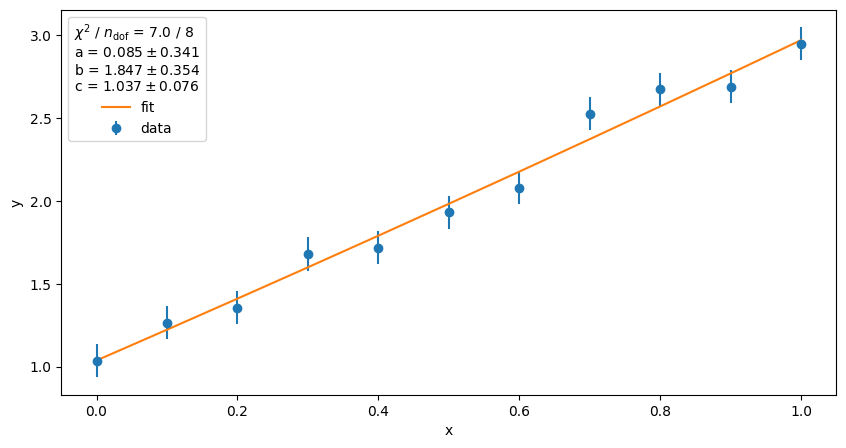

In [217]:
plt.figure(figsize=(10, 5))
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, poly_line(data_x, *m.values), label="fit")
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Vediamo diversi modi per ispezionare valori ed errori dei parametri stimati.

In [218]:
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.08,0.34,-0.34,0.34,,,
1,b,1.85,0.35,-0.35,0.35,,,
2,c,1.04,0.08,-0.08,0.08,,,


In [219]:
m.covariance

,a,b,c
a,0.117,-0.12 (-0.963),0.017 (0.672)
b,-0.12 (-0.963),0.126,-0.022 (-0.816)
c,0.017 (0.672),-0.022 (-0.816),0.0058


In [220]:
m.covariance.correlation()

,a,b,c
a,1,-1,0.7
b,-1,1,-0.8
c,0.7,-0.8,1


In [221]:
for p in m.params:
    print(repr(p), "\n")

Param(number=0, name='a', value=0.08493888940522842, error=0.34139571395285156, merror=(-0.34139437080802104, 0.3413943711908974), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 

Param(number=1, name='b', value=1.847338990081902, error=0.35446005820761395, merror=(-0.3544587784316068, 0.35445877852696067), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 

Param(number=2, name='c', value=1.037197122879678, error=0.07618538965575826, merror=(-0.0761852730522219, 0.07618527271297251), is_const=False, is_fixed=False, lower_limit=None, upper_limit=None) 



In [222]:
for p in m.params:
    print(p.name, "= {:.3f} ± {:.3f}".format(p.value, p.error))
print("err(a) = {:.3f}".format(math.sqrt(m.covariance[0, 0])))
print("err(b) = {:.3f}".format(math.sqrt(m.covariance[1, 1])))
print("err(c) = {:.3f}".format(math.sqrt(m.covariance[2, 2])))
print("cov(a,b) = {:.3f}".format(m.covariance[0, 1]))
print("cov(a,c) = {:.3f}".format(m.covariance[0, 2]))
print("cov(b,b) = {:.3f}".format(m.covariance[1, 2]))

a = 0.085 ± 0.341
b = 1.847 ± 0.354
c = 1.037 ± 0.076
err(a) = 0.341
err(b) = 0.354
err(c) = 0.076
cov(a,b) = -0.117
cov(a,c) = 0.017
cov(b,b) = -0.022


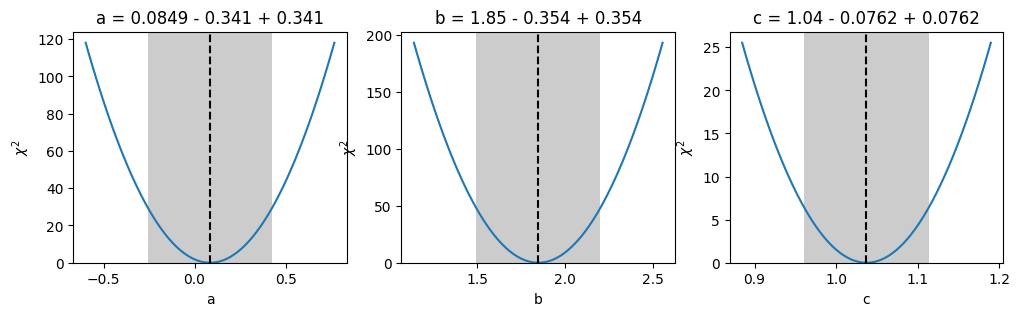

In [223]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
plt.sca(axs[0])
x, y = m.draw_profile("a")
plt.sca(axs[1])
x, y = m.draw_profile("b")
plt.sca(axs[2])
x, y = m.draw_profile("c")
axs[0].set_ylabel("$\chi^2$")
axs[1].set_ylabel("$\chi^2$")
axs[2].set_ylabel("$\chi^2$")
axs[0].set_ylim(0)
axs[1].set_ylim(0)
axs[2].set_ylim(0)
plt.show()

In [224]:
av, bv, cv = m.values['a'], m.values['b'], m.values['c']
ae, be, ce = m.errors['a'], m.errors['b'], m.errors['c']
ap, am, bp, bm, cp, cm = av + ae, av - ae, bv + be, bv - be , cv + ce, cv - ce

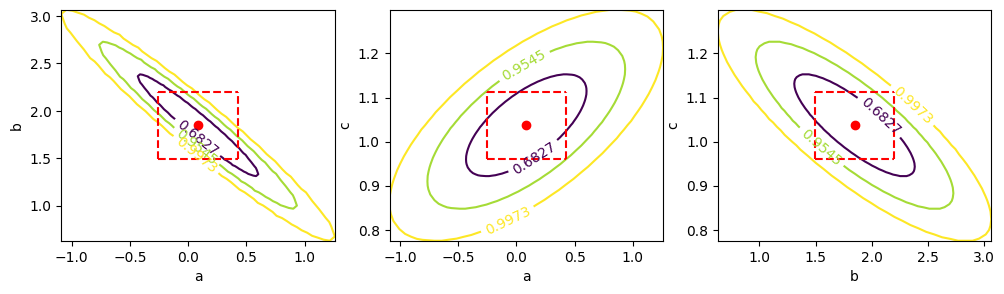

In [226]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
plt.sca(axs[0])
m.draw_mncontour("a", "b", cl=(0.68269, 0.95450, 0.99730))
plt.plot((av), (bv), marker='o', color='r')
plt.plot((am, am), (bm, bp), linestyle='--', color='r')
plt.plot((ap, ap), (bm, bp), linestyle='--', color='r')
plt.plot((am, ap), (bm, bm), linestyle='--', color='r')
plt.plot((am, ap), (bp, bp), linestyle='--', color='r')
plt.sca(axs[1])
m.draw_mncontour("a", "c", cl=(0.68269, 0.95450, 0.99730))
plt.plot((av), (cv), marker='o', color='r')
plt.plot((am, am), (cm, cp), linestyle='--', color='r')
plt.plot((ap, ap), (cm, cp), linestyle='--', color='r')
plt.plot((am, ap), (cm, cm), linestyle='--', color='r')
plt.plot((am, ap), (cp, cp), linestyle='--', color='r')
plt.sca(axs[2])
m.draw_mncontour("b", "c", cl=(0.68269, 0.95450, 0.99730))
plt.plot((bv), (cv), marker='o', color='r')
plt.plot((bm, bm), (cm, cp), linestyle='--', color='r')
plt.plot((bp, bp), (cm, cp), linestyle='--', color='r')
plt.plot((bm, bp), (cm, cm), linestyle='--', color='r')
plt.plot((bm, bp), (cp, cp), linestyle='--', color='r')
plt.show()

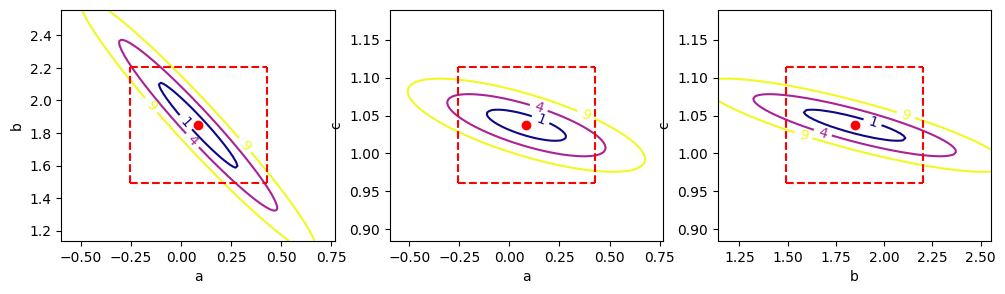

In [49]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
x, y, z = m.contour("a", "b", subtract_min=True, size=100)
cs = axs[0].contour(x, y, z, (1, 4, 9), cmap='plasma')
axs[0].plot((av), (bv), marker='o', color='r')
axs[0].plot((am, am), (bm, bp), linestyle='--', color='r')
axs[0].plot((ap, ap), (bm, bp), linestyle='--', color='r')
axs[0].plot((am, ap), (bm, bm), linestyle='--', color='r')
axs[0].plot((am, ap), (bp, bp), linestyle='--', color='r')
axs[0].set_xlabel('a')
axs[0].set_ylabel('b')
axs[0].clabel(cs)
x, y, z = m.contour("a", "c", subtract_min=True, size=100)
cs = axs[1].contour(x, y, z, (1, 4, 9), cmap='plasma')
axs[1].plot((av), (cv), marker='o', color='r')
axs[1].plot((am, am), (cm, cp), linestyle='--', color='r')
axs[1].plot((ap, ap), (cm, cp), linestyle='--', color='r')
axs[1].plot((am, ap), (cm, cm), linestyle='--', color='r')
axs[1].plot((am, ap), (cp, cp), linestyle='--', color='r')
axs[1].set_xlabel('a')
axs[1].set_ylabel('c')
axs[1].clabel(cs)
x, y, z = m.contour("b", "c", subtract_min=True, size=100)
cs = axs[2].contour(x, y, z, (1, 4, 9), cmap='plasma')
axs[2].plot((bv), (cv), marker='o', color='r')
axs[2].plot((bm, bm), (cm, cp), linestyle='--', color='r')
axs[2].plot((bp, bp), (cm, cp), linestyle='--', color='r')
axs[2].plot((bm, bp), (cm, cm), linestyle='--', color='r')
axs[2].plot((bm, bp), (cp, cp), linestyle='--', color='r')
axs[2].set_xlabel('b')
axs[2].set_ylabel('c')
axs[2].clabel(cs)
plt.show()

Sopra, nella rappresentazione a tre dimensioni, non è più ovvio recuperare la corrispondenza grafica tra
intervalli a $\pm 1 \sigma$ e la tangente all'ellissoide che era visualizzabile in due dimensioni. Gli intervalli corrispondono ora ad iperpiani in 3 dimension tagnenti all'ellissoide, e non sono facilmente visualizzabili negle proiezioni a due dimensioni.

## Limiti ai parametri
I parametri possono essere costretti entro limiti espliciti.

In [227]:
m.limits = [(0, None), (0, 10), (0, 4)]
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.08,0.34,-0.34,0.34,0,,
1,b,1.85,0.35,-0.35,0.35,0,10,
2,c,1.04,0.08,-0.08,0.08,0,4,


Si può fissare il valore di uno o più parametri.

In [228]:
m.values["a"] = 0
m.fixed["a"] = True
m.params

,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed
0,a,0.00,0.34,-0.34,0.34,0,,yes
1,b,1.85,0.35,-0.35,0.35,0,10,
2,c,1.04,0.08,-0.08,0.08,0,4,


In [229]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.02 (χ²/ndof = 0.8)       │             Nfcn = 35371             │
│ EDM = 3.15e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.00    │   0.34    │   -0.34    │    0.34    │    0    │         │  yes  │
│ 1 │ b    │   1.93    │   0.10    │   -0.35    │    0.35    │    0    │   10    │       │
│ 2 │ c    │   1.02    │   0.06    │   -0.08    │    0.08    │    0    │    4    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.34   │   0.34    │   -0.35   │   0.35    │   -0.08   │   0.08    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │       0   0.000  0.0000 │
│ b │   0.000 0.00909 -0.0045 │
│ c │  0.0000 -0.0045 0.00318 │
└───┴─────────────────────────┘

In [230]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.02 (χ²/ndof = 0.8)       │             Nfcn = 35381             │
│ EDM = 3.15e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.00    │   0.34    │   -0.34    │    0.34    │    0    │         │  yes  │
│ 1 │ b    │   1.93    │   0.10    │   -0.35    │    0.35    │    0    │   10    │       │
│ 2 │ c    │   1.02    │   0.06    │   -0.08    │    0.08    │    0    │    4    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │           c           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.34   │   0.34    │   -0.35   │   0.35    │   -0.08   │   0.08    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────────────┐
│   │       a       b       c │
├───┼─────────────────────────┤
│ a │       0   0.000  0.0000 │
│ b │   0.000 0.00909 -0.0045 │
│ c │  0.0000 -0.0045 0.00318 │
└───┴─────────────────────────┘

## Funzioni con più minimi


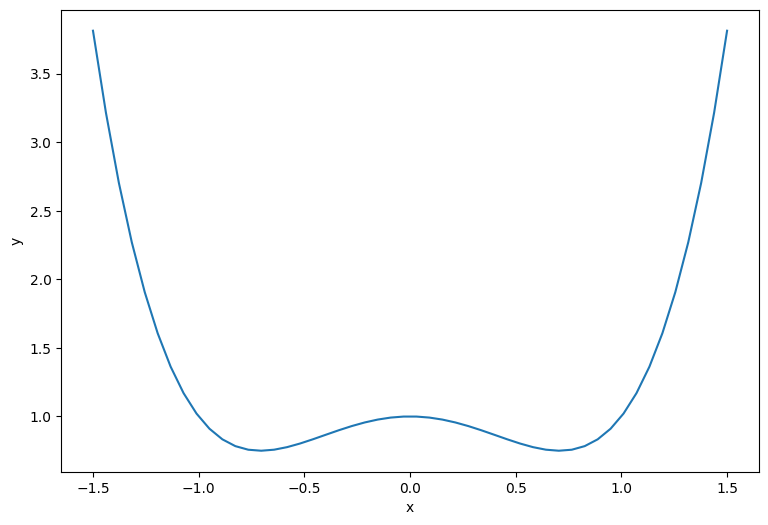

In [233]:
def f2min(x):
    return x**4 - x**2 + 1

# tratta la funzione come Chi^2 anziché come Likelihood
f2min.errordef = Minuit.LEAST_SQUARES 

plt.figure(figsize=(9,6))
x = np.linspace(-1.5, 1.5)
plt.plot(x, f2min(x))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [232]:
m = Minuit(f2min, x=-0.1)
m.migrad()
print("starting value -0.1, minimum at", m.values["x"])

starting value -0.1, minimum at -0.7085906080341975


In [234]:
m.values["x"] = 0.1  # m.values[0] = 0.1 also works
m.migrad()
print("starting value +0.1, minimum at", m.values["x"])

starting value +0.1, minimum at 0.708796091342642


# Fit di una funzione generica

In [237]:
import numpy.random as random
def fit_model(x, h, l):
    return h*(1.0 - np.exp(-l*x))
h_true = 50
l_true = 0.3
data_x = np.linspace(1, 20, 21)
data_y0 = fit_model(data_x, h_true, l_true)
data_y = random.poisson(lam=data_y0)
data_yerr = np.sqrt(data_y)

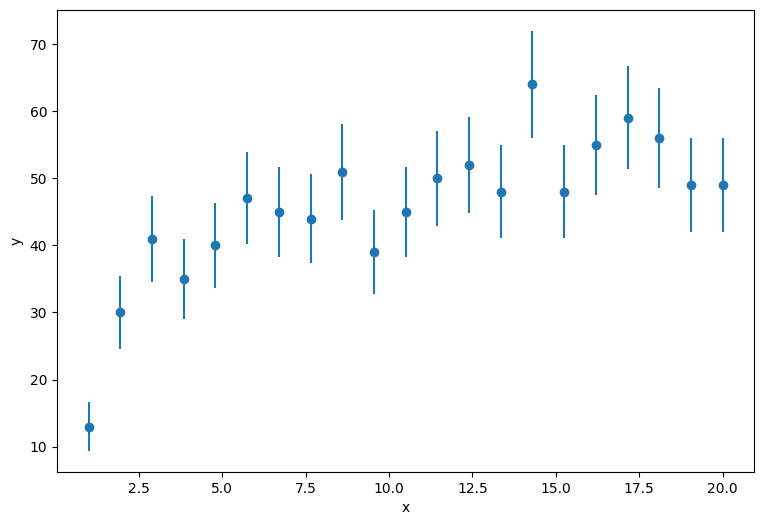

In [238]:
plt.figure(figsize=(9,6), dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [242]:
least_squares_mode = LeastSquares(data_x, data_y, data_yerr, fit_model)
m = Minuit(least_squares_mode, h=55, l=1)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.02 (χ²/ndof = 0.6)      │              Nfcn = 68               │
│ EDM = 3.03e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h    │   51.1    │    2.2    │            │            │         │         │       │
│ 1 │ l    │   0.36    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       h       l │
├───┼─────────────────┤
│ h │    4.78  -0.091 │
│ l │  -0.091 0.00409 │
└───┴─────────────────┘

In [60]:
m.hesse()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.7 (χ²/ndof = 1.5)       │              Nfcn = 73               │
│ EDM = 1.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h    │   46.7    │    2.4    │            │            │         │         │       │
│ 1 │ l    │   0.30    │   0.06    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       h       l │
├───┼─────────────────┤
│ h │    5.59 -0.0969 │
│ l │ -0.0969 0.00332 │
└───┴─────────────────┘

In [61]:
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 27.7 (χ²/ndof = 1.5)       │              Nfcn = 157              │
│ EDM = 1.94e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ h    │   46.7    │    2.4    │    -2.3    │    2.5     │         │         │       │
│ 1 │ l    │   0.30    │   0.06    │   -0.05    │    0.06    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           h           │           l           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -2.3    │    2.5    │   -0.05   │   0.06    │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬─────────────────┐
│   │       h       l │
├───┼─────────────────┤
│ h │    5.59 -0.0969 │
│ l │ -0.0969 0.00332 │
└───┴─────────────────┘

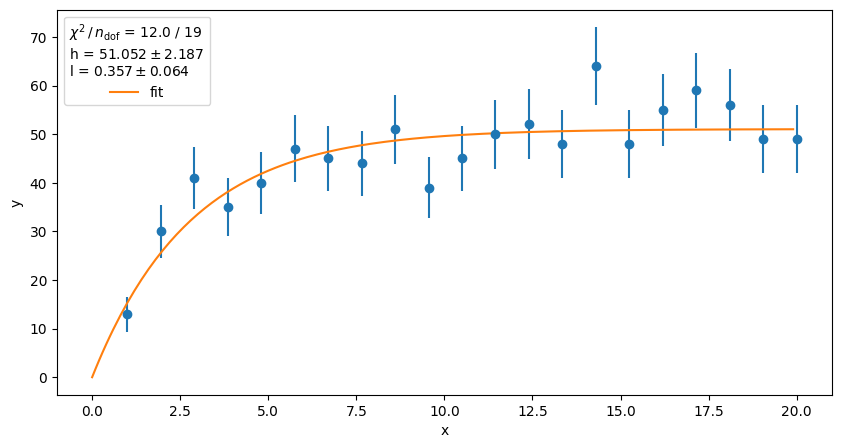

In [243]:
plt.figure(figsize=(10, 5))
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
data_x_f = np.arange(0, 20, 0.1)
data_y_f = fit_model(data_x_f, *m.values)
plt.plot(data_x_f, data_y_f, label="fit")
plt.xlabel('x')
plt.ylabel('y')
fit_info = [ rf"$\chi^2\,/\,n_\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(rf"{p} = ${v:.3f} \pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))
plt.show()

## Valori inziali

Con gli esempi che abbiamo visto, simulati, *sappiamo* qual è il valore *vero*, ossia quello che abbiamo usato per generare i campioni di dati che abbiamo usato per il fit.

Quando abbiamo campioni di dati veri *non conosciamo* i valori veri. Bisogna quindi provare diversi valori iniziali che si possono determinare approssimativamente dai dati stessi. Non è ovvio che il fit convergerà.

Esistono diverse pratiche usate per trovare i valori iniziali, che potranno essere provate in vari esempi. Come prima cosa, si possono determinare in prima approssimazione alcuni parametri in base ad alcunce caratteristiche. Esempio:
* dove si trova un asintoto (e quindi come questo si riflette nella scelta di uno o più parametri)
* dove si trova un picco e quanto è largo
* quanto vale, approssimativamente, la pendenza di un andamento in approssimazione lineare o esponenziale

Una possibilità è fare il fit di una regione limitata del campione e determinare alcuni parametri che saranno poi usati come valori iniziali.

A volte conviene fissare alcuni parametri, determinarne alcuni, e, solo come ultimo passo, si possono determinare tutti i valori.

Inevitabilmente l'esperienza sarà un fattore importrante per trovare in modo rapido la migliore startegia per i casi pià complicati.